In [309]:
import sympy as sp
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

# Definer variable her
R = sp.symbols("R")
variables = [R]

V_kugle = (4/3) * sp.pi * R**3

# En funktion der returnerer en liste med de partielle afledede af et udtryk
def partial_derivatives(expr):
    return [(sp.diff(expr, var), var) for var in variables]

# Brug ophobningsloven til at finde udtrykket for usikkerheden på g for et givent udtryk
# Tager et udtryk, en liste med usikkerheder på parametrene og en liste med parametre fra et fit som input
def prop_uncert(expr, uncertainties):
    partials = partial_derivatives(expr)
    expr = sp.sqrt(sum([(partials[i][0] * uncertainties[i])**2 for i in range(len(partials))]))
    return expr





### Sæbeoble nr. 5
Boble ligger ovenpå, sugerør ovenfra

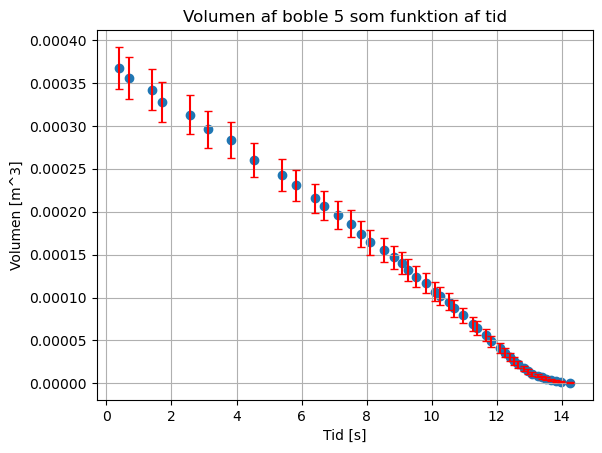

In [310]:
import pandas as pd
import sympy as sp
import numpy as np
from scipy.optimize import curve_fit

# Indlæs data
data = pd.read_csv('Bubble-5-bedre.csv', delimiter=';', skiprows=1, decimal=',', usecols=[0,2])
data = data.dropna()
data = data.to_numpy()

t_arr = data[:,0]
y_arr = data[:,1]

# Udregn radius (R = 0 cm ved Y = 0 cm)
R_arr = (1/2) * abs(y_arr) / 100

# Udregn volumen 
# [m^3]
V_arr = (4/3) * np.pi * R_arr**3

# Udregn usikkerheder på volumen med ophobningsloven
# Antager at usikkerheden på radius er 0.001 m
uncert_expr = prop_uncert(V_kugle, [0.001])

uncert_arr = np.array([float(uncert_expr.subs(R, R_arr[i])) for i in range(len(R_arr))])

V_arr= np.array([float(V_arr[i]) for i in range(len(V_arr))])

# Plot data
plt.figure(1)
plt.scatter(t_arr, V_arr)
plt.errorbar(t_arr, V_arr, yerr=uncert_arr, fmt='none', color="r", capsize=3)
plt.xlabel('Tid [s]')
plt.ylabel('Volumen [m^3]')
plt.title('Volumen af boble 5 som funktion af tid')
plt.grid()
plt.show()



Vi fjerner "halen" hvor grafen begynder at krumme opad

C:\Users\marcu\AppData\Local\Temp\ipykernel_13756\1918881184.py:8: RuntimeWarning: invalid value encountered in power
  V = lambda t, V_0, k: (V_0**(4/3) + k*t)**(3/4)
C:\Users\marcu\AppData\Local\Temp\ipykernel_13756\1918881184.py:8: RuntimeWarning: invalid value encountered in scalar power
  V = lambda t, V_0, k: (V_0**(4/3) + k*t)**(3/4)


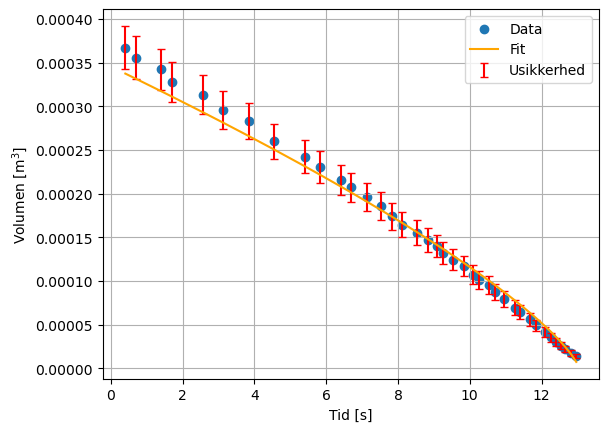

In [311]:
# Slet datapunkter efter og inklusive t = 12 s
mask = t_arr < 13
t_arr = t_arr[mask]
V_arr = V_arr[mask]
uncert_arr = uncert_arr[mask]

# Fit data
V = lambda t, V_0, k: (V_0**(4/3) + k*t)**(3/4)

par, cov = curve_fit(V, t_arr, V_arr, sigma=uncert_arr, absolute_sigma=True, p0=[V_arr[0], 0.001], maxfev=10000)

# Plot data og fit
plt.figure(2)
plt.scatter(t_arr, V_arr, label="Data")
plt.errorbar(t_arr, V_arr, yerr=uncert_arr, fmt='none', color="r", capsize=3, label="Usikkerhed")
plt.plot(t_arr, V(t_arr, *par), color="orange", label="Fit")
plt.xlabel('Tid [s]')
plt.ylabel(r'Volumen [m$^3$]')
plt.grid()
plt.legend()
plt.show()



$\chi^2_{red}$ udregnes

In [312]:
Ndof = len(t_arr) - len(par)

chi_squared_red = sum(((V_arr - V(t_arr, *par)) / uncert_arr)**2) / Ndof

# Udregn usikkerheder på parametrene
par_uncert = np.sqrt(np.diag(cov))
# Print resultater
print("Fit parametre:")
print("V_0 = {:.6f} +/- {:.0e}".format(par[0], par_uncert[0]))
print("k = {:.8f} +/- {:.0e}".format(par[1], par_uncert[1]))

print("Reduceret chi^2 = {:.2f}".format(chi_squared_red))





Fit parametre:
V_0 = 0.000345 +/- 6e-06
k = -0.00000186 +/- 4e-08
Reduceret chi^2 = 0.75


Residualplot

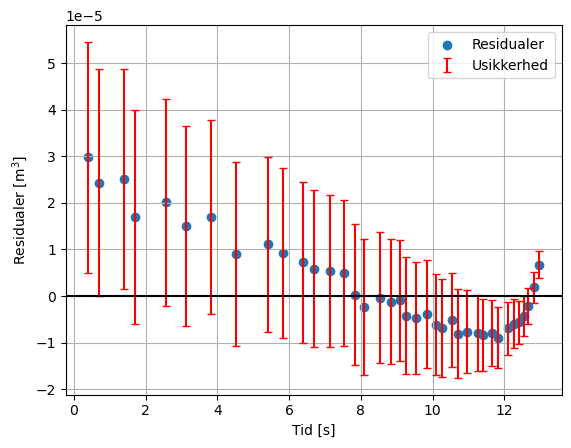

In [313]:
# Lav residualplot
plt.figure(3)
plt.scatter(t_arr, V_arr - V(t_arr, *par), label="Residualer")
plt.errorbar(t_arr, V_arr - V(t_arr, *par), yerr=uncert_arr, fmt='none', color="r", capsize=3, label="Usikkerhed")
plt.axhline(0, color="black")
plt.xlabel('Tid [s]')
plt.ylabel(r'Residualer [m$^3$]')
plt.grid()
plt.legend()
plt.show()

Vi prøver et fit med lineær + eksp. oveni

C:\Users\marcu\AppData\Local\Temp\ipykernel_13756\1351160348.py:3: RuntimeWarning: invalid value encountered in power
  V_2 = lambda t, V_0, k, a, b, c: (V_0**(4/3) + k*t)**(3/4) + (a*t + b) + c*np.exp(t)
C:\Users\marcu\AppData\Local\Temp\ipykernel_13756\1351160348.py:3: RuntimeWarning: invalid value encountered in scalar power
  V_2 = lambda t, V_0, k, a, b, c: (V_0**(4/3) + k*t)**(3/4) + (a*t + b) + c*np.exp(t)


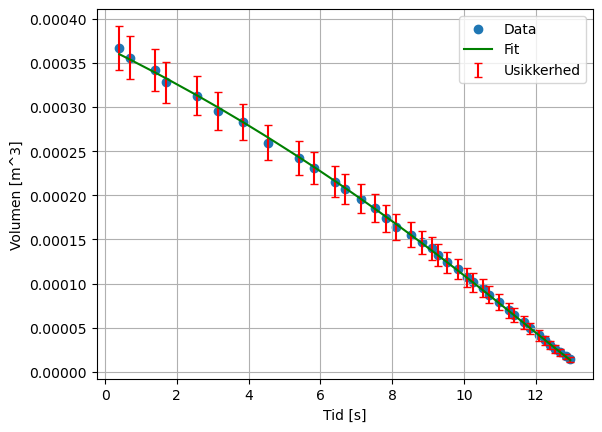

In [314]:
# Nyt fit med samme funktion som før plus en lineær fkt. og en eksp. fkt.

V_2 = lambda t, V_0, k, a, b, c: (V_0**(4/3) + k*t)**(3/4) + (a*t + b) + c*np.exp(t)

par_2, cov_2 = curve_fit(V_2, t_arr, V_arr, sigma=uncert_arr, absolute_sigma=True, p0=[V_arr[0], 0.01, 0, 0, 0], maxfev=10000)

V_0_1, k_1, a_1, b_1, c_1 = par_2

# Plot fit
plt.figure(4)
plt.scatter(t_arr, V_arr, label="Data")
plt.errorbar(t_arr, V_arr, yerr=uncert_arr, fmt='none', color="r", capsize=3, label="Usikkerhed")
plt.plot(t_arr, V_2(t_arr, *par_2), color="green", label="Fit")
plt.xlabel('Tid [s]')
plt.ylabel('Volumen [m^3]')
plt.grid()
plt.legend()
plt.show()


In [315]:
Ndof = len(t_arr) - len(par)

chi_squared_red = sum(((V_arr - V_2(t_arr, *par_2))**2 / uncert_arr**2)) / Ndof

print("Reduceret chi^2 = ", chi_squared_red)



Reduceret chi^2 =  0.02198438061929934


### Sæbeoble nr. 12
Boble ligger ovenpå, sugerør nedefra

       0  8,01601187981
0  0.633       7.889688
1  1.267       7.770415
2  2.067       7.665145
3  2.533       7.576261
4  3.333       7.403162


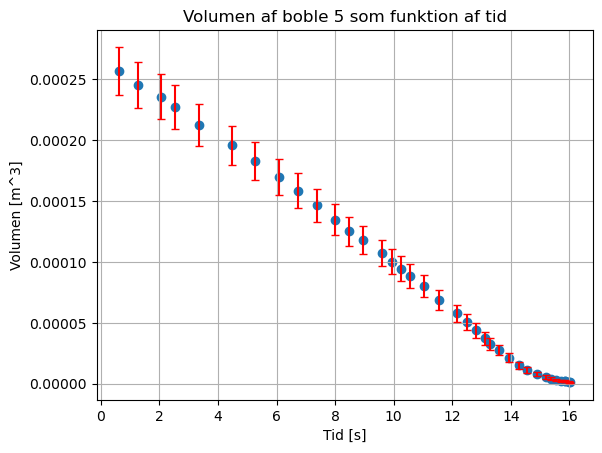

In [316]:
import pandas as pd
import sympy as sp
import numpy as np
from scipy.optimize import curve_fit

# Indlæs data
data = pd.read_csv('Bubbles12.csv', delimiter=';', skiprows=1, decimal=',', usecols=[0,2])
print(data.head())
data = data.dropna()
data = data.to_numpy()

t_arr = data[:,0]
y_arr = data[:,1]

# Udregn radius (R = 0 cm ved Y = 0 cm)
R_arr = (1/2) * abs(y_arr) / 100

# Udregn volumen 
# [m^3]
V_arr = (4/3) * sp.pi * R_arr**3

# Udregn usikkerheder på volumen med ophobningsloven
# Antager at usikkerheden på radius er 0.001 m
uncert_expr = prop_uncert(V_kugle, [0.001])

uncert_arr = np.array([float(uncert_expr.subs(R, R_arr[i])) for i in range(len(R_arr))])

V_arr= np.array([float(V_arr[i]) for i in range(len(V_arr))])

# Plot data
plt.figure(3)
plt.scatter(t_arr, V_arr)
plt.errorbar(t_arr, V_arr, yerr=uncert_arr, fmt='none', color="r", capsize=3)
plt.xlabel('Tid [s]')
plt.ylabel('Volumen [m^3]')
plt.title('Volumen af boble 5 som funktion af tid')
plt.grid()
plt.show()



C:\Users\marcu\AppData\Local\Temp\ipykernel_13756\3356557525.py:8: RuntimeWarning: invalid value encountered in power
  V = lambda t, V_0, k: (V_0**(4/3) + k*t)**(3/4)
C:\Users\marcu\AppData\Local\Temp\ipykernel_13756\3356557525.py:8: RuntimeWarning: invalid value encountered in scalar power
  V = lambda t, V_0, k: (V_0**(4/3) + k*t)**(3/4)


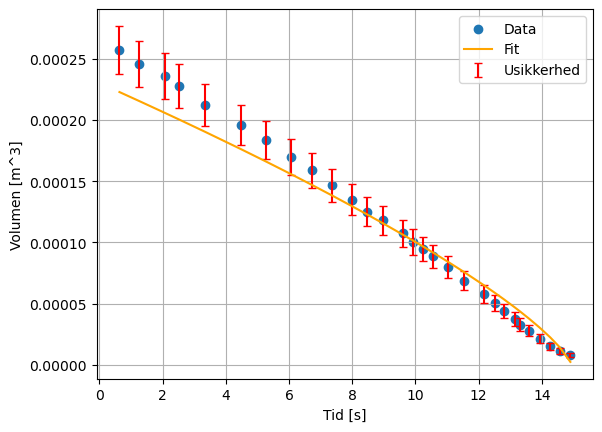

In [317]:
# Slet datapunkter efter og inklusive t = 15 s
mask = t_arr < 15
t_arr = t_arr[mask]
V_arr = V_arr[mask]
uncert_arr = uncert_arr[mask]

# Fit data
V = lambda t, V_0, k: (V_0**(4/3) + k*t)**(3/4)

par, cov = curve_fit(V, t_arr, V_arr, sigma=uncert_arr, absolute_sigma=True, p0=[V_arr[0], 0.01], maxfev=10000)

V_0, k = par

# Udregn usikkerheder på parametrene
par_uncert = np.sqrt(np.diag(cov))

# Plot data og fit
plt.figure(4)
plt.scatter(t_arr, V_arr, label="Data")
plt.errorbar(t_arr, V_arr, yerr=uncert_arr, fmt='none', color="r", capsize=3, label="Usikkerhed")
plt.plot(t_arr, V(t_arr, V_0, k), color="orange", label="Fit")
plt.xlabel('Tid [s]')
plt.ylabel('Volumen [m^3]')
plt.grid()
plt.legend()
plt.show()


$\chi^2_{red}$ udregnes

In [318]:
Ndof = len(t_arr) - len(par)

chi_squared_red = sum(((V_arr - V(t_arr, *par))**2 / uncert_arr**2)) / Ndof

print("Reduceret chi^2 = ", chi_squared_red)



Reduceret chi^2 =  2.1317038435812505
